# Training, validation, and test sets

# K fold validation

# Vectorization

# Normalization

normalize each feature independently so that it had a standard deviation of 1 and a mean of 0.

# Feature engineering

modern deep learning removes the need for most feature engineering, because neural networks are capable of automatically extracting useful features from raw data.

# Overfitting
Model too specific for training set, while the goal is generalization.
Solution: More data, less complex network, weight regularization

#### regularization
put constraints on the complexity of a network by forcing its weights to take only small values, which makes the distribution of weight values more regular. L1 vs L2

#### dropout
Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Dropout rate [0.2, 0.5]

# Last-layer activation
sigmoid - binary

multiclass, single-label classification - softmax

multiclass, multi-label classification - sigmoid

regression - None

regression to [0, 1] - sigmoid

# Underfitting
Solution: More complexed network, bigger layers, more epochs

# Tune everything
play with it

In [ ]:
# Embedding
Use the Embedding layer in a Keras model to learn task-specific token embeddings

# RNN

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\kqe27\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\kqe27\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 15s 87ms/step - loss: 0.6323 - acc: 0.6145 - val_loss: 0.4186 - val_acc: 0.8202
Epoch 2/10
157/157 [==============================] - 12s 75ms/step - loss: 0.3541 - acc: 0.8522 - val_loss: 0.3891 - val_acc: 0.8330
Epoch 3/10
157/157 [==============================] - 12s 78ms/step - loss: 0.2697 - acc: 0.8941 - val_loss: 0.3426 - val_acc: 0.8646
Epoch 4/10
157/157 [==============================] - 12s 79ms/step - loss: 0.2144 - acc: 0.9207 - val_loss: 0.3908 - val_acc: 0.8230
Epoch 5/10
157/157 [==============================] - 13s 82ms/step - loss: 0.1557 - acc: 0.9450 - val_loss: 0.3860 - val_acc: 0.8526
Epoch 6/10
157/157 [==============================] - 13s 80ms/step - loss: 0.1050 - acc: 0.9658 - val_loss: 0.4489 - val_acc: 0.8396
Epoch 7/10
157/157 [==============================] - 14s 87ms/step - loss: 0.0614 - acc: 0.9810 - val_loss: 0.5465 - val_acc: 0.8036
Epoch 8/10
157/157 [==============================] - 12s 79ms

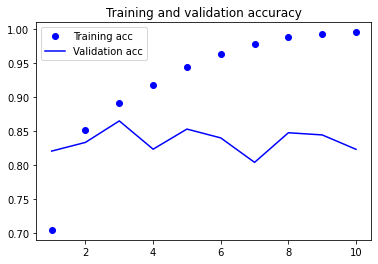

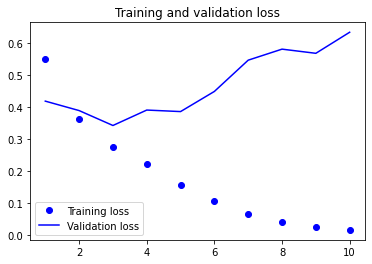

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 33s 194ms/step - loss: 0.5959 - acc: 0.6803 - val_loss: 0.4944 - val_acc: 0.7782
Epoch 2/10
157/157 [==============================] - 35s 221ms/step - loss: 0.3096 - acc: 0.8728 - val_loss: 0.4077 - val_acc: 0.8204
Epoch 3/10
157/157 [==============================] - 31s 200ms/step - loss: 0.2343 - acc: 0.9129 - val_loss: 0.3306 - val_acc: 0.8688
Epoch 4/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1855 - acc: 0.9296 - val_loss: 0.2994 - val_acc: 0.8710
Epoch 5/10
157/157 [==============================] - 30s 191ms/step - loss: 0.1644 - acc: 0.9401 - val_loss: 0.3238 - val_acc: 0.8822
Epoch 6/10
157/157 [==============================] - 27s 175ms/step - loss: 0.1473 - acc: 0.9487 - val_loss: 0.2977 - val_acc: 0.8810
Epoch 7/10
157/157 [==============================] - 29s 185ms/step - loss: 0.1329 - acc: 0.9550 - val_loss: 0.3316 - val_acc: 0.8880
Epoch 8/10
157/157 [==============================] - 2

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


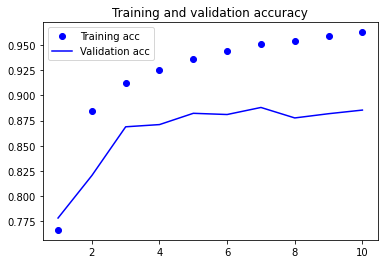

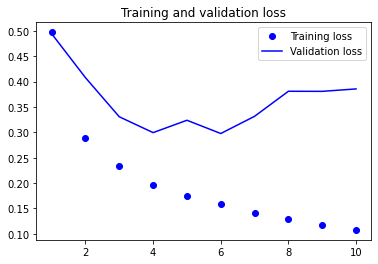

In [9]:
import matplotlib.pyplot as plt
model.summary()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()